In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, classification_report

import firebase_admin
from firebase_admin import credentials, firestore
from torchvision import datasets

#### Firebase Setup ##################################################################################################################
if not firebase_admin._apps:
    cred = credentials.Certificate('serviceAccount.json')
    firebase_admin.initialize_app(cred)
db = firestore.client()

print("Firebase ok")

/home/andrea/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/andrea/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:644: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Firebase ok


In [2]:
labels = []
docs = db.collection('blip2_miniImageNet').stream()

true_labels = []
predicted_labels = []

for doc in docs:
    doc_ref = db.collection('blip2_miniImageNet').document(doc.id)
    doc_dict = doc.to_dict()

    if doc.id == "last_index":
        continue

    if 'Predicted_Label' in doc_dict:
        true_labels.append(doc_dict['True_Label'].lower().strip().replace(' ', '_'))
        predicted_labels.append(doc_dict['Predicted_Label'].lower().strip().replace(' ', '_'))

labels = np.unique(np.concatenate((predicted_labels, true_labels)))
# labels = np.unique(predicted_labels)

In [3]:
for el in predicted_labels:
    if (el not in labels):
        print(f"ERROR: {el}")

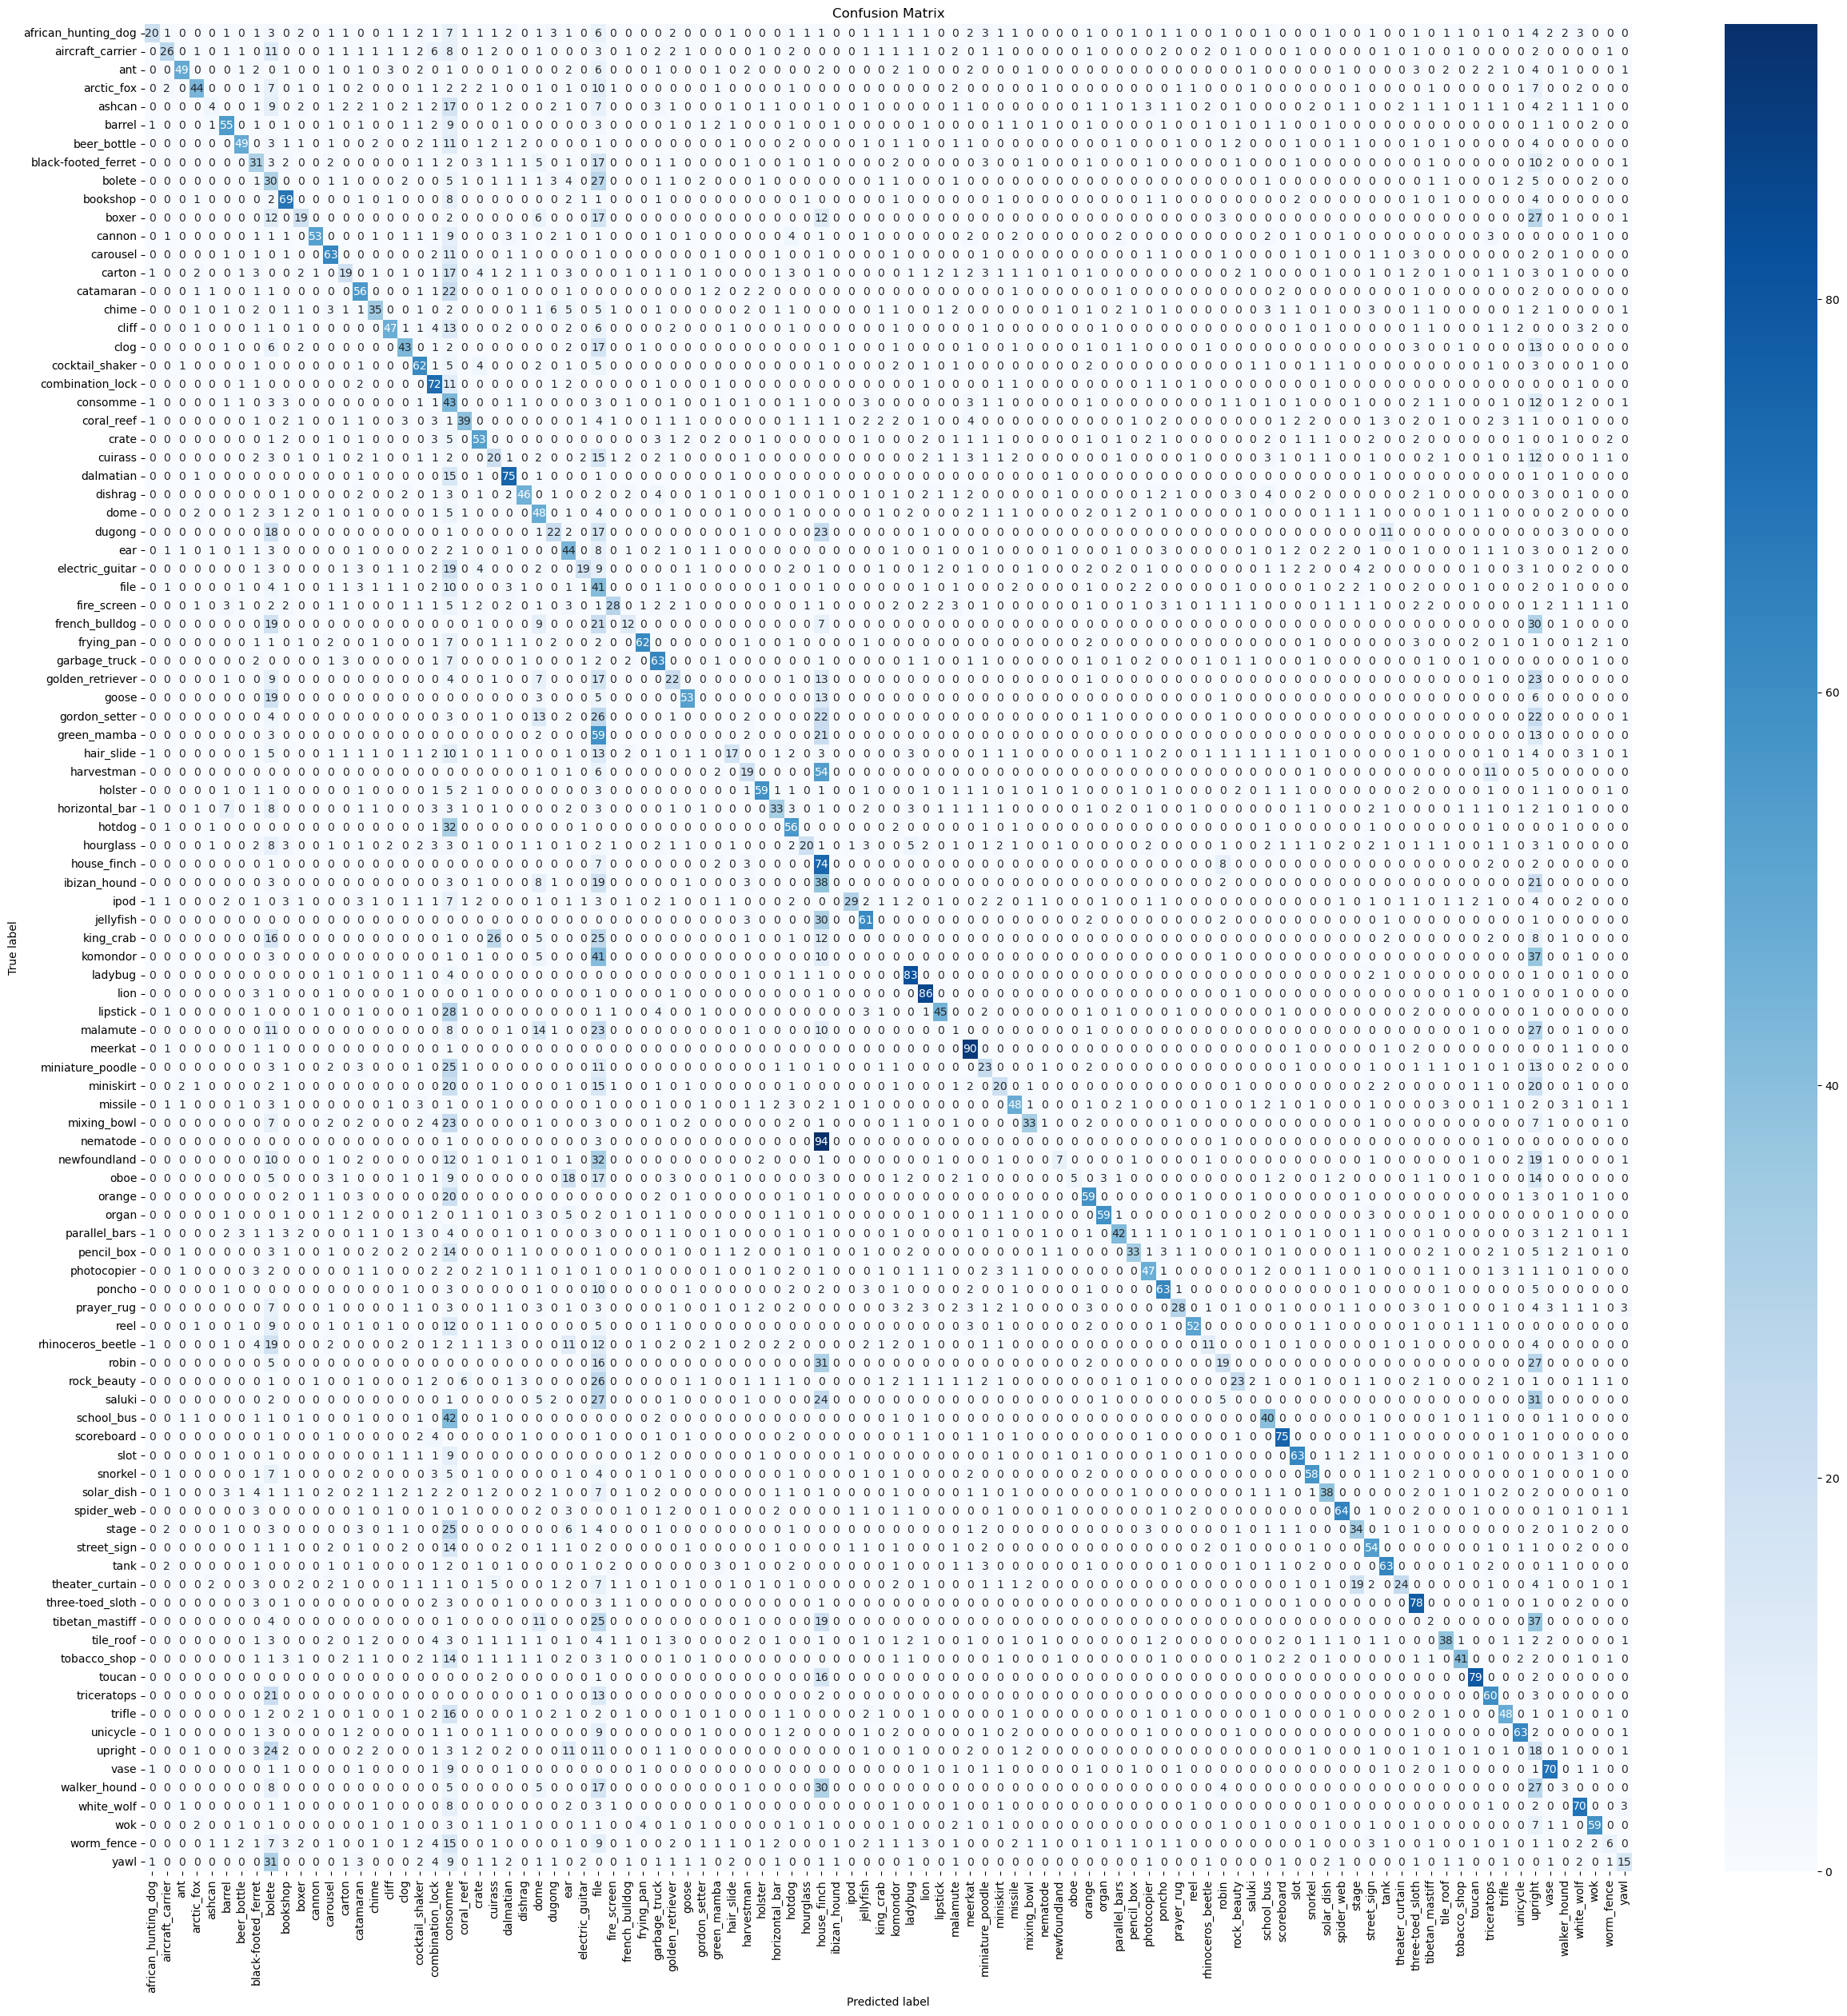

In [4]:
confusion_mat = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(30, 30))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('blip2.png')
plt.show()

In [5]:
classification_report = classification_report(true_labels, predicted_labels, target_names=labels)

with open("blip2.txt", "w") as f:
    print(classification_report, file=f)

print(classification_report)

                     precision    recall  f1-score   support

african_hunting_dog       0.65      0.20      0.31       100
   aircraft_carrier       0.59      0.26      0.36       100
                ant       0.84      0.49      0.62       100
         arctic_fox       0.71      0.44      0.54       100
             ashcan       0.33      0.04      0.07       100
             barrel       0.64      0.55      0.59       100
        beer_bottle       0.73      0.49      0.59       100
black-footed_ferret       0.30      0.31      0.31       100
             bolete       0.07      0.30      0.11       100
           bookshop       0.58      0.69      0.63       100
              boxer       0.40      0.19      0.26       100
             cannon       0.91      0.53      0.67       100
           carousel       0.55      0.63      0.59       100
             carton       0.47      0.19      0.27       100
          catamaran       0.43      0.56      0.49       100
              chime    

In [6]:
# ERROR RATE
def calculate_error_rate(true_labels, predicted_labels):
    assert len(true_labels) == len(predicted_labels), "Both arrays must have the same length"
    
    total = len(true_labels)
    incorrect_predictions = sum(true != pred for true, pred in zip(true_labels, predicted_labels))
    
    error_rate = incorrect_predictions / total
    return error_rate

error_rate = calculate_error_rate(true_labels, predicted_labels)
print(f"Error rate: {error_rate}")


Error rate: 0.6055605560556055
